In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# analysis paper
# import libraries
import seaborn as sns
import numpy as np
import scipy.stats as _stats
from functools import reduce
from pipeline.analysis import *
from pipeline.utils import validate
from pipeline import *
import logging
import networkx as nx
import glob
from scipy.stats import sem as sem
import sys
import random

# sys.path.insert(1, "/home/anna/Documents/code/python/pipeline")


from matplotlib.ticker import MaxNLocator

logging.getLogger().setLevel(logging.INFO)

print(BSS.__file__)

INFO:rdkit:Enabling RDKit 2023.09.6 jupyter extensions


/home/anna/BioSimSpace/python/BioSimSpace/__init__.py


/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

In [3]:
protein = "mcl1"
bench_folder = f"/home/anna/Documents/benchmark"
main_dir = f"{bench_folder}/reruns/{protein}"

ana_prot = analysis_protocol(
    {
        "estimator": "MBAR",
        "method": "alchemlyb",
        "check overlap": True,
        "try pickle": True,
        "save pickle": True,
        "auto equilibration": False,
        "statistical inefficiency": False,
        "truncate lower": 0,
        "truncate upper": 100,
        "name": None,
    }
)

net_file = f"{main_dir}/execution_model/network.dat"
exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"
output_folder = f"{main_dir}/outputs_extracted"

pipeline_prot = pipeline_protocol(
    f"{main_dir}/execution_model/protocol.dat", auto_validate=True
)  # no protocol used , name added after if needed
# pipeline_prot = pipeline_protocol(auto_validate=True)

# initialise the network object
ana_obj = analysis_network(
    output_folder,
    exp_file=exp_file,
    net_file=net_file,
    analysis_prot=ana_prot,
    # method=pipeline_prot.name(),  # if the protocol had a name
    engines=pipeline_prot.engines(),
)

# compute
ana_obj.compute_results()

# # add ligands folder
# if os.path.isdir(f"{bench_folder}/inputs/{protein}/ligands"):
#     all_analysis_object.add_ligands_folder(
#         f"{bench_folder}/inputs/{protein}/ligands")
# else:
#     all_analysis_object.add_ligands_folder(
#         f"{bench_folder}/inputs/{protein}/ligands_neutral")

ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
INFO:root:mbar method not found in protocol. None will be used.
INFO:root:number of lambda windows not found in protocol. 12 will be used.
INFO:root:rerun not found in protocol. False will be used.
INFO:root:reverse not found in protocol. False will be used.
INFO:root:config options not found in protocol. None will be used.
INFO:root:config options file not found in protocol. None will be used.
INFO:root:name not found in protocol. None will be used.
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:<pipeline.prep._protocol.analysis_protocol object at 0x79a90ba1b160> / 'dictionary' must be of type 'dict'.
ERROR:root:dictionary wasn't recognised either. trying to read as pipeline protocol...
INFO:root:no output folder provided, writing all output to the 'output_folder/analysis'.
/home/anna/mambaforge/en

In [9]:
ana_obj.calc_pert_dict

{'SOMD': {'lig_29~lig_33': (-4.0155, 0.3834),
  'lig_27~lig_29': (0.6481, 0.5283),
  'lig_31~lig_36': (nan, nan),
  'lig_35~lig_36': (0.4843, 0.1286),
  'lig_49~lig_50': (-1.3386, 0.0944),
  'lig_50~lig_61': (-1.5904, 0.0923)},
 'AMBER': {'lig_29~lig_33': (-4.9481, 0.2312),
  'lig_27~lig_29': (1.6844, 0.1052),
  'lig_49~lig_50': (-1.0034, 0.0612),
  'lig_50~lig_61': (-1.4171, 0.1377)},
 'GROMACS': {'lig_29~lig_33': (-7.1256, 0.7965),
  'lig_27~lig_29': (nan, nan),
  'lig_31~lig_36': (nan, nan),
  'lig_35~lig_36': (nan, nan),
  'lig_49~lig_50': (nan, nan),
  'lig_50~lig_61': (nan, nan)}}

In [8]:
ana_obj.remove_perturbations(["lig_31~lig_36", "lig_35~lig_36"], "AMBER")

/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/anna/mambaforge/envs/pipeline/lib/python3.9/site-

In [14]:
ana_pert = pipeline.analysis.analyse(
    "/home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/SOMD/lig_27~lig_29"
)
ana_pert.analyse_all_repeats()
ana_pert.plot_convergence()

INFO:root:There are 3 repeats for each the bound and the free for /home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/SOMD/lig_27~lig_29. These are ['bound_0', 'bound_1', 'bound_2'] and ['free_0', 'free_1', 'free_2'].
INFO:root:trying to locate pickles in default pickle folder, /home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/SOMD/lig_27~lig_29/pickle for lig_27~lig_29_SOMD_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0_100...
INFO:root:pickles found!
INFO:root:analysing using {'estimator': 'MBAR', 'method': 'alchemlyb', 'check overlap': True, 'try pickle': True, 'save pickle': True, 'auto equilibration': False, 'statistical inefficiency': False, 'truncate lower': 0, 'truncate upper': 100, 'mbar method': None, 'name': None}.
INFO:root:There are 3 calculated values for each the bound and the free leg for the folders in /home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/SOMD/lig_27~lig_29.
INFO:root:3 repeats will be calculated.
INFO:root:calculating repe

ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:trhing free bound
ERROR:root:'lig_49'
ERROR:root:lig_49 not in both dicts, AMBER and calc
ERROR:root:'lig_50'
ERROR:root:lig_50 not in both dicts, AMBER and calc
ERROR:root:'lig_61'
ERROR:root:lig_61 not in both dicts, AMBER and calc
ERROR:root:'lig_27'
ERROR:root:lig_27 not in both dicts, AMBER and calc
ERROR:root:'lig_49'
ERROR:root:lig_49 not in both dicts, AMBER and calc
ERROR:root:'lig_50'
ERROR:root:lig_50 not in both dicts, AMBER and calc
ERROR:root:'lig_61'
ERROR:root:lig_61 not in both dicts, AMBER and calc
ERROR:root:'NoneType' object is not subscriptable
ERROR:root:lig_29 not in both dicts, AMBER and calc
ERROR:root:'NoneType' object is not subscriptable
ERROR:root:lig_33 not in both dicts, AMBER and calc
ERROR:root:'NoneType' object is not subscriptable
ERROR:root:lig_27 not in both dicts, AMBER and calc
ERROR:root:'lig_49'
ERROR:root:lig_49 not in both dicts, AMBER and calc
ERROR:root:'lig_50'
ERROR:root:

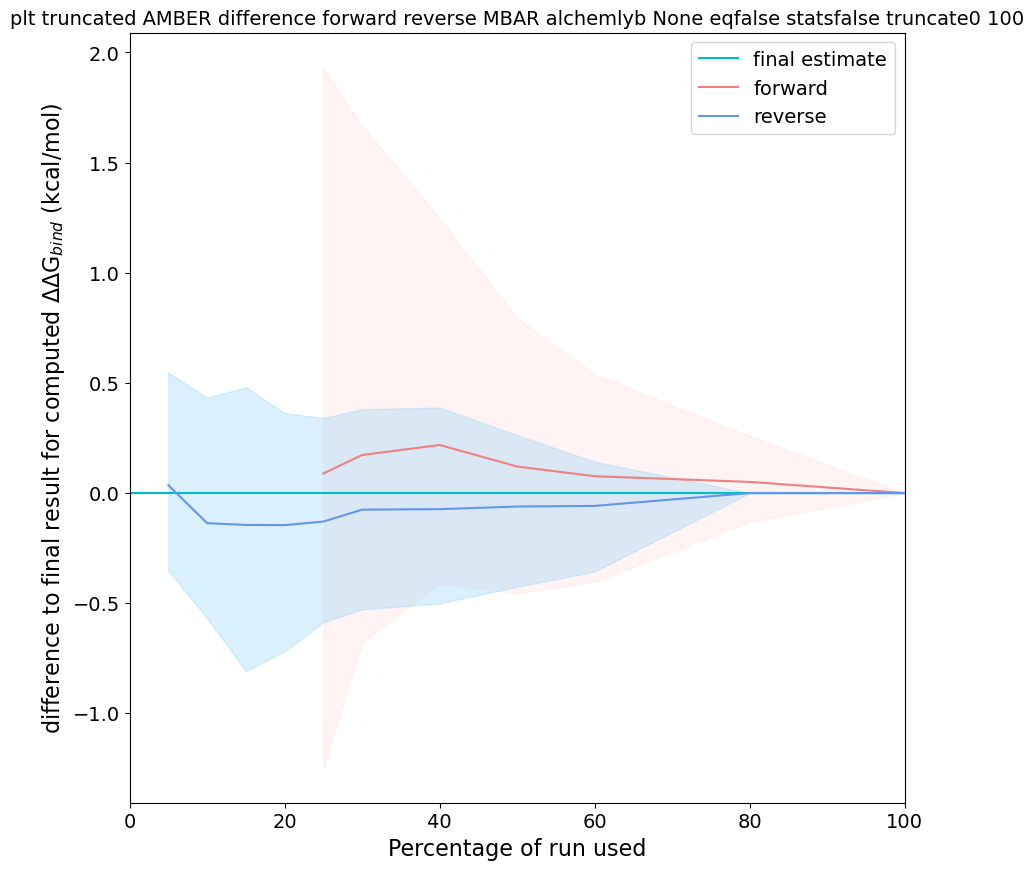

In [16]:
ana_obj.plot_convergence("AMBER")

In [15]:
ana_obj.compute_convergence(compute_missing=True)

ERROR:root:could not load pickles for lig_49~lig_50 in AMBER. Was it analysed for convergence?
INFO:root:There are 3 repeats for each the bound and the free for /home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/AMBER/lig_49~lig_50. These are ['bound_0', 'bound_1', 'bound_2'] and ['free_0', 'free_1', 'free_2'].
ERROR:root:'file_path' must be of type 'str'.
ERROR:root:Not recognised as file, trying to read as dictionary...
ERROR:root:<pipeline.prep._protocol.analysis_protocol object at 0x79a90ba1b0d0> / 'dictionary' must be of type 'dict'.
ERROR:root:dictionary wasn't recognised either. trying to read as pipeline protocol...
INFO:root:calculating convergence for AMBER lig_49~lig_50 ...
INFO:root:trying to locate pickles for convergence in default pickle folder, /home/anna/Documents/benchmark/reruns/mcl1/outputs_extracted/AMBER/lig_49~lig_50/pickle for lig_49~lig_50_AMBER_MBAR_alchemlyb_None_eqfalse_statsfalse_...
INFO:root:loading pickle failed. Calculating normally.
INFO:root